# Assignment 15

In [74]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [75]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=features,
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph


def calculate_accuracy(predictions, actuals):
    if (len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)


In [76]:
Penguins = sns.load_dataset('penguins')
Penguins = Penguins.dropna()
Penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [77]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
Penguin_train, Penguin_test = train_test_split(Penguins, test_size=0.3, random_state=42,)
dt = DecisionTreeRegressor(max_depth=5)

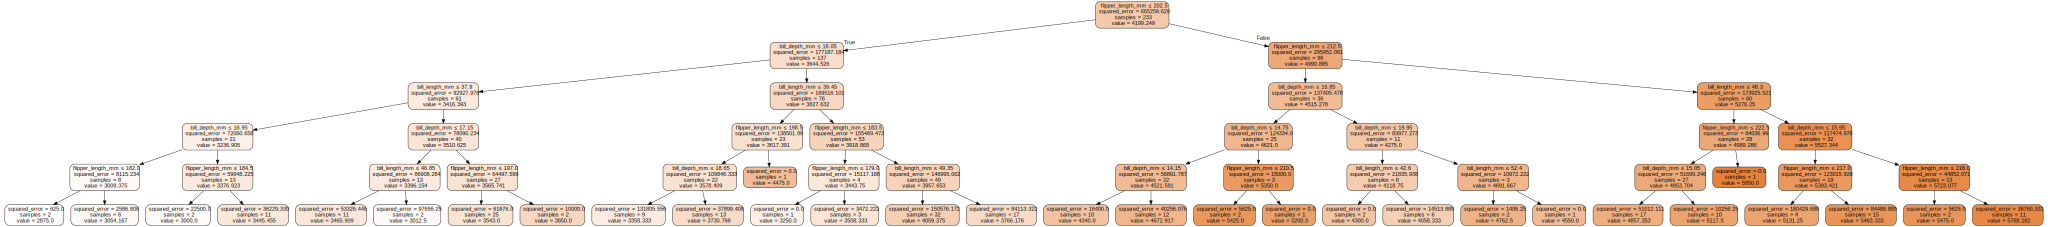

In [78]:
dt.fit(Penguin_train[features], Penguin_train['body_mass_g'])
plot_tree_regression(dt,  features)